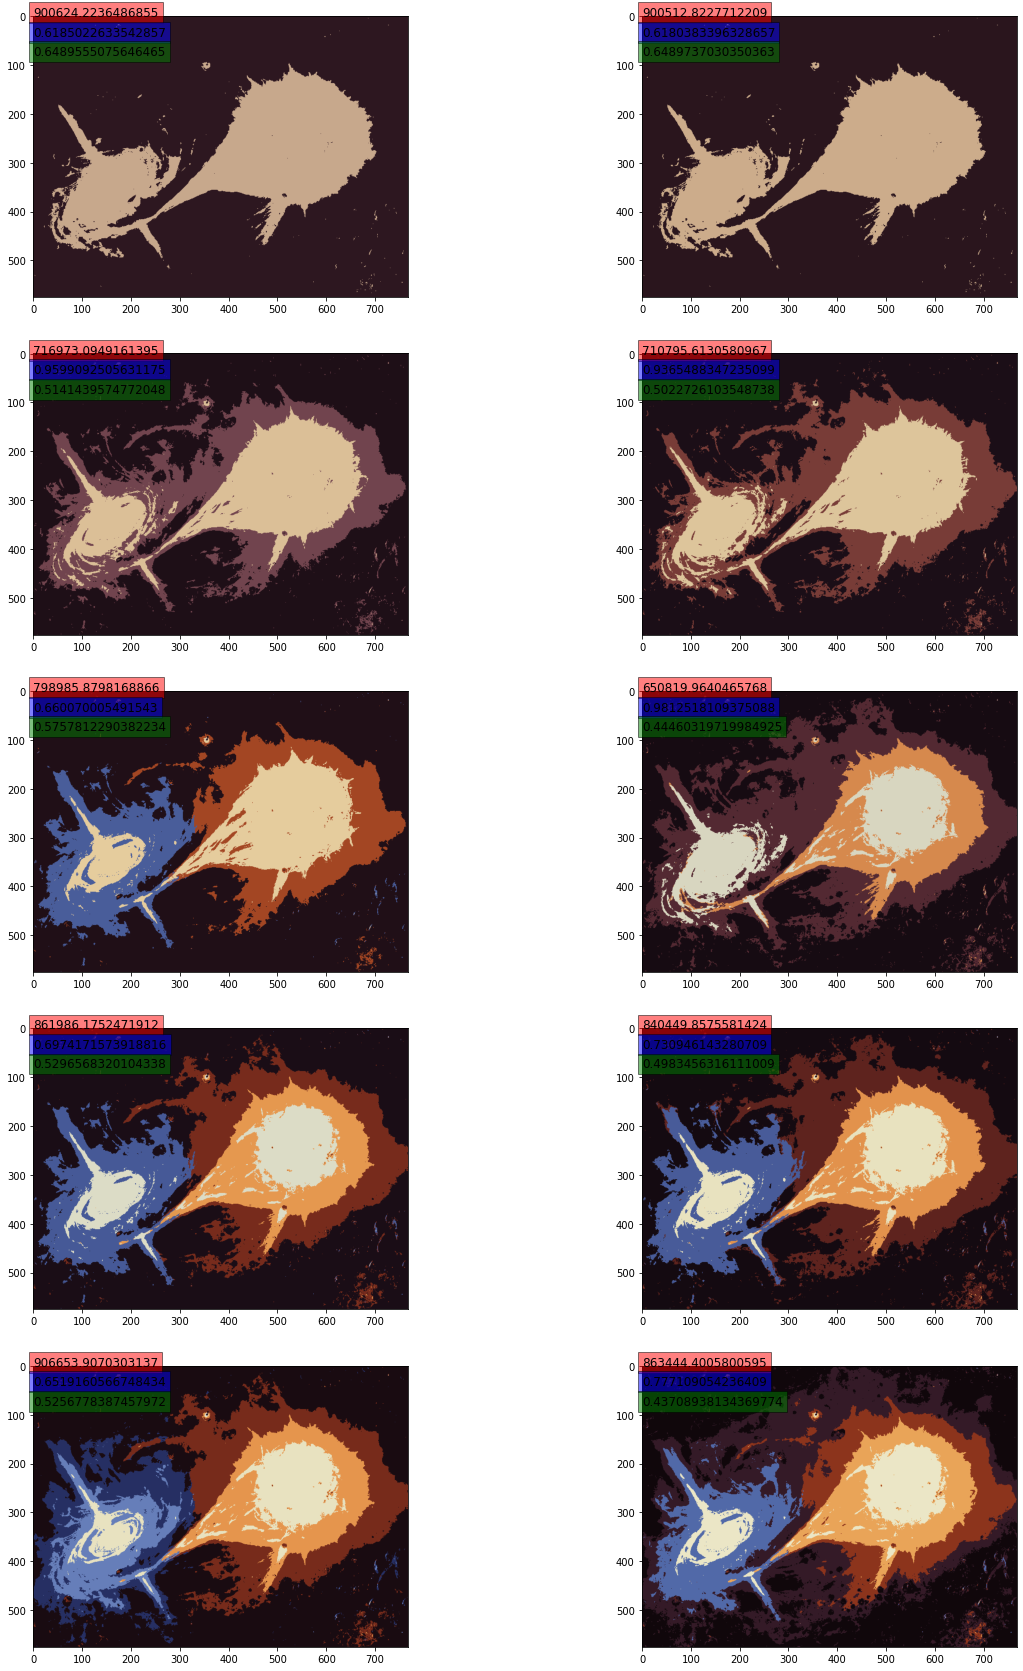

In [1]:
from matplotlib import image
from pathlib import Path
from skfuzzy import cmeans
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
import  matplotlib.pyplot as plt
import numpy as np


N_CLUSTERS = 7


processed_images = [image.imread(file) / 255 for file in Path.cwd().glob('data/*.jpg')]
fig, axs = plt.subplots(nrows=N_CLUSTERS-2, ncols=2, figsize=(20,30))


for pr_img_id, pr_img in enumerate(processed_images):
    for n_clusters in range(2, N_CLUSTERS):


        x, y ,z = pr_img.shape
        clf = KMeans(n_clusters=n_clusters)
        clf.fit(pr_img.reshape(x * y, z))

        segmented = clf.cluster_centers_[clf.labels_].reshape(x,y,z)

        axs[n_clusters-2,0].text(0,0, calinski_harabasz_score(pr_img.reshape(x * y, z), clf.labels_), fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
        axs[n_clusters-2,0].text(0,40, davies_bouldin_score(pr_img.reshape(x * y, z), clf.labels_), fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
        axs[n_clusters-2,0].text(0,80, silhouette_score(pr_img.reshape(x * y, z), clf.labels_), fontsize=12, bbox=dict(facecolor='green', alpha=0.5))
        axs[n_clusters-2,0].imshow(segmented)


        x, y ,z = pr_img.shape
        cntr, u, _, _, _, _, _ = cmeans(pr_img.reshape(x * y, z).T, n_clusters, m=2, error=1e-2, maxiter=200)
        labels = np.argmax(u, axis=0)

        segmented = cntr[labels].reshape(pr_img.shape)

        axs[n_clusters-2,1].text(0,0, calinski_harabasz_score(pr_img.reshape(x * y, z), labels), fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
        axs[n_clusters-2,1].text(0,40, davies_bouldin_score(pr_img.reshape(x * y, z), labels), fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
        axs[n_clusters-2,1].text(0,80, silhouette_score(pr_img.reshape(x * y, z), labels), fontsize=12, bbox=dict(facecolor='green', alpha=0.5))
        axs[n_clusters-2,1].imshow(segmented)

    break
plt.show()